In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

salaries = pd.read_csv('./ds_salaries_clean.csv')
salaries.head()

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0


In [49]:

job_titles = ['Data Scientist', 'Machine Learning Scientist', 'Big Data Engineer', 'Product Data Analyst',
              'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist', 'Business Data Analyst',
              'Lead Data Engineer', 'Lead Data Analyst', 'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
              'Director of Data Science', 'Research Scientist', 'Machine Learning Manager', 'Data Engineering Manager',
              'Machine Learning Infrastructure Engineer', 'ML Engineer', 'AI Scientist', 'Computer Vision Engineer',
              'Principal Data Scientist', 'Data Science Manager', 'Head of Data', '3D Computer Vision Researcher',
              'Data Analytics Engineer', 'Applied Data Scientist', 'Marketing Data Analyst', 'Cloud Data Engineer',
              'Financial Data Analyst', 'Computer Vision Software Engineer', 'Director of Data Engineering',
              'Data Science Engineer', 'Principal Data Engineer', 'Machine Learning Developer',
              'Applied Machine Learning Scientist', 'Data Analytics Manager', 'Head of Data Science', 'Data Specialist',
              'Data Architect', 'Finance Data Analyst', 'Principal Data Analyst', 'Big Data Architect',
              'Staff Data Scientist', 'Analytics Engineer', 'ETL Developer', 'Head of Machine Learning', 'NLP Engineer',
              'Lead Machine Learning Engineer', 'Data Analytics Lead']

job_categories = ['Machine Learning', 'Data Engineering', 'Data Analytics', 'Data Science', 'Other', 'Managerial']

for title in job_titles:
    title_words = title.lower().split()
    category = 'Other'
    for word in title_words:
        if word in ['machine', 'learning', 'ai']:
            category = 'Machine Learning'
        elif word in ['manager', 'director', 'head']:
            category = 'Managerial'
        elif word in ['data', 'engineering', 'etl']:
            category = 'Data Engineering'
        elif word in ['analytics', 'marketing']:
            category = 'Data Analytics'
        elif word in ['science', 'scientist']:
            category = 'Data Science'
    print(f"{title}: {category}")

Data Scientist: Data Science
Machine Learning Scientist: Data Science
Big Data Engineer: Data Engineering
Product Data Analyst: Data Engineering
Machine Learning Engineer: Machine Learning
Data Analyst: Data Engineering
Lead Data Scientist: Data Science
Business Data Analyst: Data Engineering
Lead Data Engineer: Data Engineering
Lead Data Analyst: Data Engineering
Data Engineer: Data Engineering
Data Science Consultant: Data Science
BI Data Analyst: Data Engineering
Director of Data Science: Data Science
Research Scientist: Data Science
Machine Learning Manager: Managerial
Data Engineering Manager: Managerial
Machine Learning Infrastructure Engineer: Machine Learning
ML Engineer: Other
AI Scientist: Data Science
Computer Vision Engineer: Other
Principal Data Scientist: Data Science
Data Science Manager: Managerial
Head of Data: Data Engineering
3D Computer Vision Researcher: Other
Data Analytics Engineer: Data Analytics
Applied Data Scientist: Data Science
Marketing Data Analyst: Data 

In [50]:
# map to folloing list
['Machine Learning', 'Data Engineering', 'Data Analytics',
       'Data Science', 'Other', 'Managerial']
salaries['Designation'].unique()
def map_category(title):
    if 'Data Engineer' in title:
        return 'Data Engineering'
    elif 'Data Scientist' in title:
        return 'Data Science'
    elif 'Data Analyst' in title:
        return 'Data Analyst'
    elif 'Machine Learning' in title:
        return 'Machine Learning'
    elif 'Manager' in title:
        return 'Managerial'
    else:
        return 'Other'
salaries['Job_Category'] = salaries['Designation'].apply(map_category)
# salaries['Job_Category'] = np.where(salaries['Designation'].isin(['Data Science','Scientist','Data']), 'Data Scientist', 'Other')
# salaries['Job_Category'] = np.where(salaries['Designation'].isin(['Machine Learning']), 'Machine Learning', salaries['Job_Category'])

# Print the relative frequency of Job_Category
# print(salaries['Job_Category'].value_counts(normalize=True))
salaries[['Designation', 'Job_Category']].head()

,Designation,Job_Category
0,Data Scientist,Data Science
1,Machine Learning Scientist,Machine Learning
2,Big Data Engineer,Data Engineering
3,Product Data Analyst,Data Analyst
4,Machine Learning Engineer,Machine Learning


In [51]:
# Print the relative frequency of Job_Category
print(salaries['Job_Category'].value_counts(normalize=True))

Job_Category
Data Science        0.261944
Data Engineering    0.260297
Data Analyst        0.196046
Other               0.148270
Machine Learning    0.102142
Managerial          0.031301
Name: proportion, dtype: float64


In [52]:
# Cross-tabulate Company_Size and Experience
print(pd.crosstab(salaries["Company_Size"], salaries["Experience"])) 

# Cross-tabulate Job_Category and Company_Size
print(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"]))
# Cross-tabulate Job_Category and Company_Size
(pd.crosstab(salaries["Job_Category"], salaries["Company_Size"],
            values=salaries["Salary_USD"], aggfunc="mean"))

Experience    Entry  Executive  Mid  Senior
Company_Size                               
L                29         11   86      72
M                30         12   98     186
S                29          3   29      22
Company_Size       L   M   S
Job_Category                
Data Analyst      27  80  12
Data Engineering  50  94  14
Data Science      55  81  23
Machine Learning  22  25  15
Managerial         8  11   0
Other             36  35  19


Company_Size,L,M,S
Job_Category,,,
Data Analyst,91862.629630,94909.250000,43074.500000
Data Engineering,112275.460000,113388.297872,85645.285714
Data Science,109180.054545,121664.888889,70426.869565
Machine Learning,119559.500000,105172.240000,93722.933333
Managerial,133528.625000,145058.636364,NaN
Other,131839.916667,115966.000000,74257.578947


In [53]:
# Cross-tabulate Company_Size and Experience with mean Salary_USD as values
print(pd.crosstab(salaries["Job_Category"], salaries["Experience"], values=salaries["Salary_USD"], aggfunc='mean'))

Experience               Entry      Executive            Mid         Senior
Job_Category                                                               
Data Analyst      54532.352941  124128.333333   74420.585366  107573.206897
Data Engineering  50880.733333  242803.285714   78692.050847  134618.727273
Data Science      55102.826087  397211.000000   80557.937500  150130.887324
Machine Learning  90696.583333   75469.000000   89169.590909  131107.407407
Managerial                 NaN            NaN  190967.000000  134231.764706
Other             53981.714286  171811.000000  108126.560000  132460.233333


In [54]:
salaries

,Working_Year,Designation,Experience,Employment_Status,Employee_Location,Company_Size,Remote_Working_Ratio,Salary_USD,Job_Category
0,2020,Data Scientist,Mid,FT,DE,L,0,76227.0,Data Science
1,2020,Machine Learning Scientist,Senior,FT,JP,S,0,248257.0,Machine Learning
2,2020,Big Data Engineer,Senior,FT,GB,M,50,104100.0,Data Engineering
3,2020,Product Data Analyst,Mid,FT,HN,S,0,19097.0,Data Analyst
4,2020,Machine Learning Engineer,Senior,FT,US,L,50,143225.0,Machine Learning
...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,Senior,FT,US,M,100,147044.0,Data Engineering
603,2022,Data Engineer,Senior,FT,US,M,100,120309.0,Data Engineering
604,2022,Data Analyst,Senior,FT,US,M,0,123174.0,Data Analyst
605,2022,Data Analyst,Senior,FT,US,M,100,143225.0,Data Analyst


In [63]:
salaries.columns

Index(['Working_Year', 'Designation', 'Experience', 'Employment_Status',
       'Employee_Location', 'Company_Size', 'Remote_Working_Ratio',
       'Salary_USD', 'Job_Category', 'date_of_response', 'month', 'weekday'],
      dtype='object')

In [69]:
[*salaries.select_dtypes('int').columns]

['Working_Year', 'Remote_Working_Ratio', 'month', 'weekday']

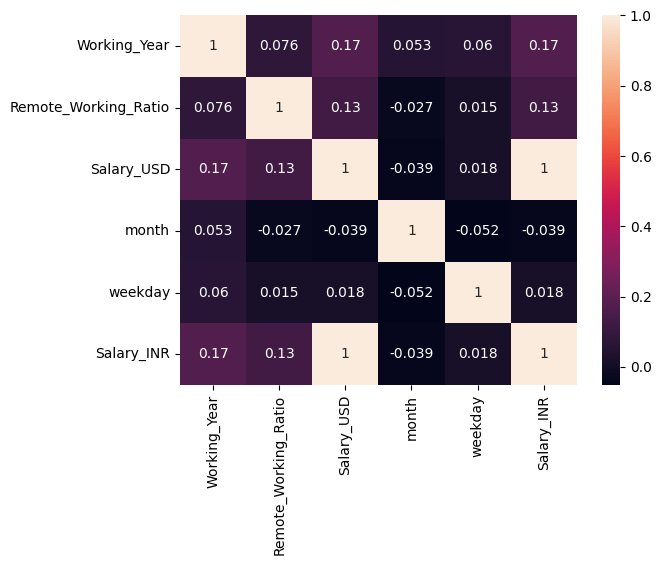

In [75]:
import random
from datetime import datetime

# Generate random dates and add to the dataframe
dates = []
for year in salaries['Working_Year']:
    month = random.choice(range(1, 13))
    day = random.choice(range(1, 29))
    date_str = f"{year}-{month}-{day}"
    date_obj = datetime.strptime(date_str, '%Y-%m-%d').date()
    dates.append(date_obj)
salaries['date_of_response'] = dates

# Extract the month from "date_of_response"
salaries["month"] = [date.month for date in salaries["date_of_response"]]

# Create the "weekday" column
salaries["weekday"] = [date.weekday() for date in salaries["date_of_response"]]
salaries['Salary_INR'] = (salaries['Salary_USD']*75).astype(int)
salaries['Salary_USD'] = salaries['Salary_USD'].astype(int)
# Plot a heat map, including the Pearson correlation coefficient scores
sns.heatmap(salaries[[*salaries.select_dtypes('int').columns]].corr(), annot=True)
plt.show()

In [77]:
# Find the 25th percentile
twenty_fifth = salaries["Salary_USD"].quantile(0.25)

# Save the median
salaries_median = salaries["Salary_USD"].median()

# Gather the 75th percentile
seventy_fifth = salaries["Salary_USD"].quantile(0.75)

print(twenty_fifth, salaries_median, seventy_fifth)
salaries.Salary_USD.describe()

59893.0 96982.0 143225.0


count       607.000000
mean     107225.836903
std       67752.393254
min        2730.000000
25%       59893.000000
50%       96982.000000
75%      143225.000000
max      572900.000000
Name: Salary_USD, dtype: float64

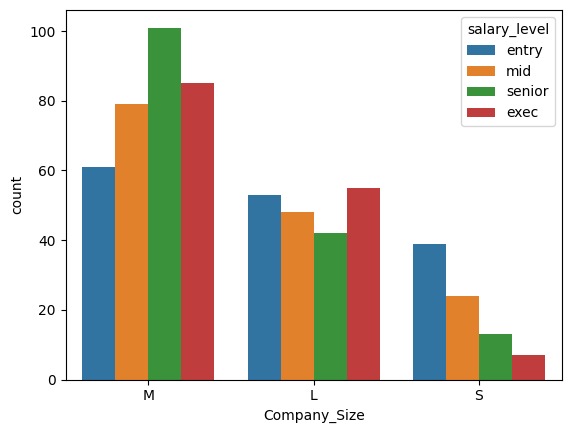

In [85]:
# Create salary labels
salary_labels = ["entry", "mid", "senior", "exec"]

# Create the salary ranges list
salary_ranges = [0, twenty_fifth, salaries_median, seventy_fifth, salaries["Salary_USD"].max()]

# Create salary_level
salaries["salary_level"] = pd.cut(salaries["Salary_USD"],
                                  bins=salary_ranges,
                                  labels=salary_labels)

# Plot the count of salary levels at companies of different sizes
sns.countplot(data=salaries, x="Company_Size", hue="salary_level", hue_order=salary_labels,
              order=salaries["Company_Size"].value_counts().index)
plt.show()

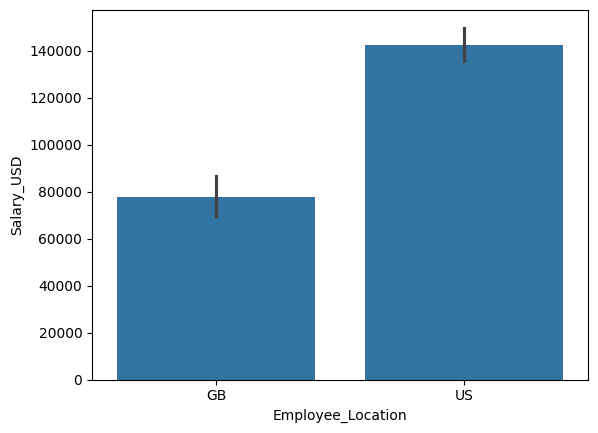

In [92]:
# Filter for employees in the US or GB
usa_and_gb = salaries[(salaries['Employee_Location'] == 'US') | (salaries['Employee_Location'] == 'GB')]

# Create a barplot of salaries by location
sns.barplot(data=usa_and_gb, x="Employee_Location", y="Salary_USD")
plt.show()

Value	Meaning
CT	Contractor
FL	Freelance
PT	Part-time
FT	Full-time

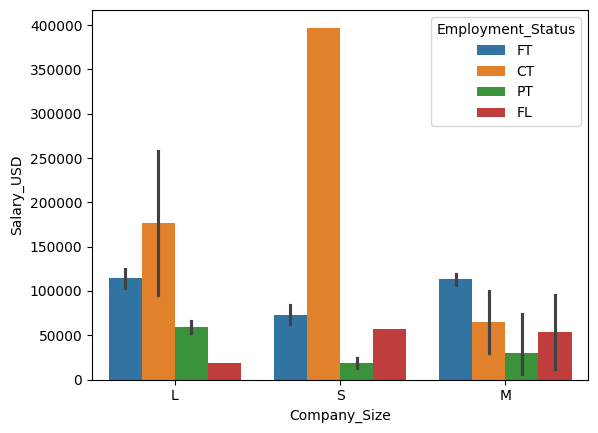

In [90]:
# Create a bar plot of salary versus company size, factoring in employment status
sns.barplot(data=salaries, x='Company_Size', y='Salary_USD', hue='Employment_Status')
plt.show()